In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
# importing Libraries

import tensorflow as tf
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [0]:
# Setting parameters

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-04-04 13:34:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-04-04 13:34:15 (169 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
# Loading the data 

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
# Splitting the dataset

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
# Tokenizing the text and padding them

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
# Converting the data into aaray so that it works with tensorflow 2.x

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
# Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6511 - accuracy: 0.6154 - val_loss: 0.5382 - val_accuracy: 0.8055
Epoch 2/30
625/625 - 3s - loss: 0.4104 - accuracy: 0.8385 - val_loss: 0.3776 - val_accuracy: 0.8425
Epoch 3/30
625/625 - 3s - loss: 0.3010 - accuracy: 0.8819 - val_loss: 0.3496 - val_accuracy: 0.8547
Epoch 4/30
625/625 - 3s - loss: 0.2501 - accuracy: 0.9042 - val_loss: 0.3520 - val_accuracy: 0.8454
Epoch 5/30
625/625 - 3s - loss: 0.2162 - accuracy: 0.9168 - val_loss: 0.3454 - val_accuracy: 0.8554
Epoch 6/30
625/625 - 3s - loss: 0.1887 - accuracy: 0.9295 - val_loss: 0.3543 - val_accuracy: 0.8532
Epoch 7/30
625/625 - 3s - loss: 0.1685 - accuracy: 0.9384 - val_loss: 0.3684 - val_accuracy: 0.8521
Epoch 8/30
625/625 - 3s - loss: 0.1491 - accuracy: 0.9456 - val_loss: 0.3856 - val_accuracy: 0.8517
Epoch 9/30
625/625 - 3s - loss: 0.1327 - accuracy: 0.9529 - val_loss: 0.4051 - val_accuracy: 0.8515
Epoch 10/30
625/625 - 3s - loss: 0.1210 - accuracy: 0.9571 - val_loss: 0.4574 - val_accuracy: 0.8351

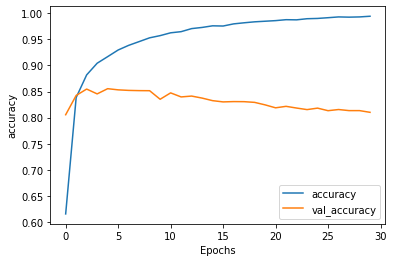

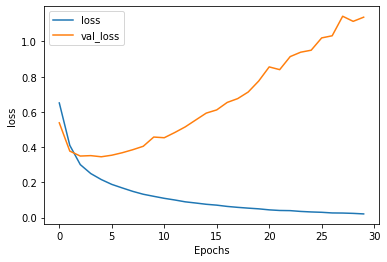

In [13]:
# looking at the stats

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
tf.keras.backend.clear_session()

# Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optim,metrics=['accuracy'])

num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 3s - loss: 0.6388 - accuracy: 0.6418 - val_loss: 0.4979 - val_accuracy: 0.8229
Epoch 2/20
625/625 - 3s - loss: 0.4572 - accuracy: 0.8552 - val_loss: 0.4597 - val_accuracy: 0.8499
Epoch 3/20
625/625 - 3s - loss: 0.4158 - accuracy: 0.8981 - val_loss: 0.4555 - val_accuracy: 0.8504
Epoch 4/20
625/625 - 3s - loss: 0.3938 - accuracy: 0.9195 - val_loss: 0.4621 - val_accuracy: 0.8416
Epoch 5/20
625/625 - 3s - loss: 0.3815 - accuracy: 0.9327 - val_loss: 0.4604 - val_accuracy: 0.8444
Epoch 6/20
625/625 - 3s - loss: 0.3712 - accuracy: 0.9427 - val_loss: 0.4637 - val_accuracy: 0.8444
Epoch 7/20
625/625 - 3s - loss: 0.3661 - accuracy: 0.9481 - val_loss: 0.4621 - val_accuracy: 0.8463
Epoch 8/20
625/625 - 3s - loss: 0.3605 - accuracy: 0.9531 - val_loss: 0.4719 - val_accuracy: 0.8332
Epoch 9/20
625/625 - 3s - loss: 0.3575 - accuracy: 0.9565 - val_loss: 0.4766 - val_accuracy: 0.8316
Epoch 10/20
625/625 - 3s - loss: 0.3540 - accuracy: 0.9599 - val_loss: 0.4652 - val_accuracy: 0.8426

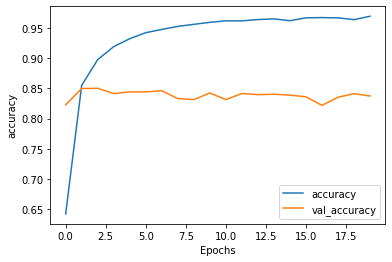

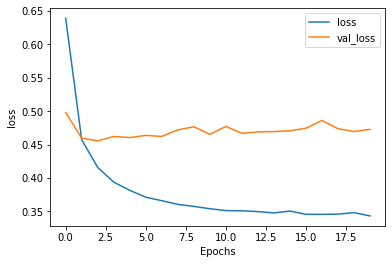

In [19]:
# looking at the stats

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
model.save('detect.h5')